# 視覚化 visualization

[Chris Olah](http://colah.github.io/) の[ブログ](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)を待つまでもなく，我々が想像できる次元は3次元程度であるので，多次元データを低次元空間へ射影(写像)する手法(視覚化または次元圧縮と呼ばれる)は古くからいくつも提案されてきている。
代表的なものとしては

- 主成分分析法 pricipal component anaylsys ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis))
- 多次元尺度構成法 multi-dimensional scaling ([MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling))
- 自己組織化写像 self-organizaton mapping ([SOM](http://www.cis.hut.fi/research/som-research/teuvo.html))
- サモンマッピング [Sammon mapping](https://en.wikipedia.org/wiki/Sammon_mapping)
- [LLE](https://www.cs.nyu.edu/~roweis/lle/) 
- [Isomap](http://web.mit.edu/cocosci/isomap/isomap.html)

などが代表的である。TensorFlow のチュートリアルでは tSNE が採用されている。
今回は tSNE に至る考え方を見ていくことにする。そのためにまず PCA による
視覚化の方法を復習し，次に SNE と tSNE を解説する。

<img src="2008tSNE_tSNE.png" width="49%">
<img src="2008tSNE_Sammon.png" width="49%">

---
scikit-learn の [manifold learning](http://scikit-learn.org/stable/modules/manifold.html) も参照のこと。

多様体 manifold を 2 次元に射影することを考えた場合，$n$ 次元空間には $n+1$ 点の等距離点が存在可能である。このような等距離 equidistant points では次元圧縮は意味がない。そうではなく空間に何らかの構造が存在する場合，次元圧縮に意味付けが可能となる。

<center>
<img src="sphx_glr_plot_compare_methods_0011.png" width="94%">
</center>

<!--- 
[http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) 
--->

<!---  [http://blog.albert2005.co.jp/2014/12/11/%E9%AB%98%E6%AC%A1%E5%85%83%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%AE%E6%89%8B%E6%B3%95%E3%82%92swiss-roll%E3%82%92%E4%BE%8B%E3%81%AB%E8%A6%8B%E3%81%A6%E3%81%BF%E3%82%88/](http://blog.albert2005.co.jp/2014/12/11/%E9%AB%98%E6%AC%A1%E5%85%83%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%AE%E6%89%8B%E6%B3%95%E3%82%92swiss-roll%E3%82%92%E4%BE%8B%E3%81%AB%E8%A6%8B%E3%81%A6%E3%81%BF%E3%82%88/)
--->


# 多様体の例 スイスロール (またの名を恵方巻き？lol)
<!--- [スイスロール](http://blog-imgs-24.fc2.com/k/o/z/kozys/swissroll.jpg)--->
<img src="http://blog-imgs-24.fc2.com/k/o/z/kozys/swissroll.jpg" width="49%">
http://blog-imgs-24.fc2.com/k/o/z/kozys/swissroll.jpg より

Automatically created module for IPython interactive environment
Computing LLE embedding
Done. Reconstruction error: 7.68477e-08


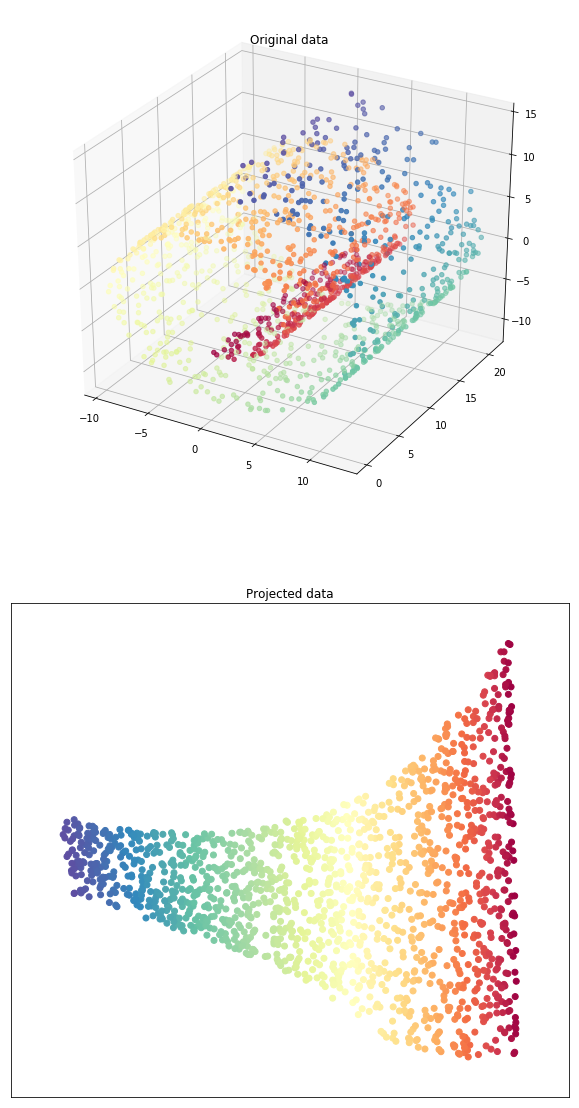

In [23]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)

import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

 


#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(211, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
except:
    ax = fig.add_subplot(211)
    ax.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets.samples_generator import make_swiss_roll

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [25]:
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)

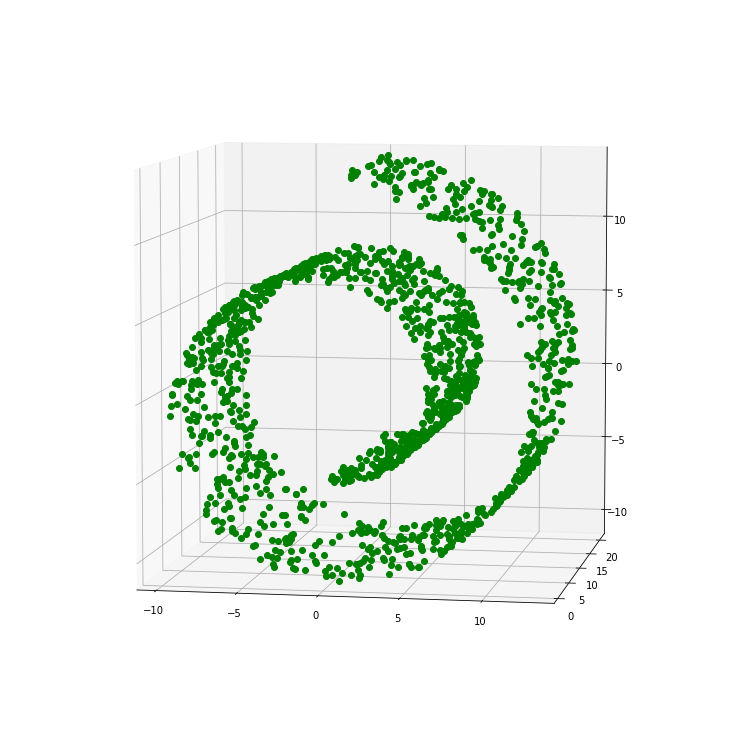

In [26]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.plot3D(X[:,0],X[:,1],X[:,2],'go')
plt.show()

---

# PCA
[PCA](http://localhost:8888/notebooks/pca.ipynb)

---

# 確率的隣接埋め込みモデル SNE

[SNE](http://localhost:8888/notebooks/sne.ipynb)

---
[execute demo code for t-SNE](http://localhost:8888/notebooks/tSNE.ipynb)